In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import xarray as xr
import os
import pandas as pd
import scipy.stats
import sys
import scipy.io
import datetime, time
import pandas as pd
import my_utils as myf
from matplotlib.gridspec import GridSpec

## Make some plots of AMOC with monthly data

In [2]:
mydir = '/glade/work/lettier/archived_data/202212_data_paper_nudge_winds_amoc/moc/'
myfiles = [mydir+f for f in sorted(os.listdir(mydir)) if '.nc' in f]

listds = []
for f in myfiles:
    ds = xr.open_dataset(f)[['moc_rapid','ekman']].rename({'moc_rapid':'MOC'})
    myname = str(f.split('/')[-1].split('natl')[0])[:-15]
    mytime = pd.date_range(start="1979-01-01",end="2018-12-31", freq='M')
    if myname=='CESM1':
        myname = 'CESM1FO'
        mytime = pd.date_range(start="1979-01-01",end="2016-12-31", freq='M')
    ds['time'] = mytime
    ds['names'] = myname
    ds = ds.set_coords('names')
    listds.append(ds)
ds = xr.concat(listds,dim='names')

In [3]:
thelens = [f for f in ds.names.values if 'LENS' in f]
lensmean = ds.isel(names=0).copy()
for var in ds:
    lensmean[var] = ds[var].sel(names=thelens).mean(dim='names')
lensmean['names'] = 'LENSmean'
lensmean =lensmean.set_coords('names')
ds = xr.concat([ds, lensmean],dim='names')

In [4]:
rapid = xr.open_dataset('/glade/work/lettier/RAPID/MOCv2021/moc_transports_200404_202039.nc')[['moc_mar_hc10','t_ek10']] # this is daily, take monthly average
rapid_mon = rapid.resample(time='1M').mean('time').rename({'moc_mar_hc10':'MOC',
                                                          't_ek10':'ekman'})
rapid_mon['names'] = 'RAPID'
rapid_mon = rapid_mon.set_coords('names')
ds = xr.concat([ds, rapid_mon],dim='names')

In [5]:
ds['residual'] = ds.MOC - ds.ekman

Set some properties for plotting

In [6]:
lineplotprop = myf.set_line_prop(ds.names.values)
lineplotprop['nudge_era_1950_ens01']['label'] = 'NUDGE-ERA5 (45-90N and 45-90S)'

#### Plot model and observations together, with 12 month smoothing

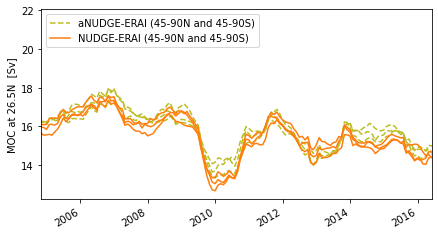

In [7]:
mynames = ['anom_nudge_era','anom_nudge_era_high','anom_nudge_era_low','nudge_era_archi', 'nudge_era_arclo', 'nudge_era_high']
fig,ax = plt.subplots(1,figsize=(7,3.5))
for n, name in enumerate(mynames):
    if 'anom' in name:
        ls = '--'
        label = 'anomaly'
    else:
        ls = '-'
        label = 'full'
    ds.rolling(time=12, center=True).mean().MOC.sel(names=name).plot(ax=ax,  **lineplotprop[name],linestyle=ls) 

ax.set_ylabel('MOC at 26.5N  [Sv]')   
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(),loc='upper left')
ax.set_xlim(['2004-11','2016-06'])
ax.set_title('')
ax.set_xlabel('')
plt.show()
fig.savefig('figs/suppFig1.pdf', dpi=500, bbox_inches='tight')
plt.close()

In [8]:
ds.names.values
mynames = ['LENS01', 'LENS02', 'LENS03', 'LENS04', 'LENS05',
       'LENS06', 'LENS07', 'LENS08', 'LENS09', 'LENS10', 'LENS11',
       'LENS12', 'LENS13', 'LENS14', 'LENS15', 'LENS16', 'LENS17',
       'LENS18', 'LENS19', 'LENS20', 'LENS21', 'LENS22', 'LENS23',
       'LENS24', 'LENS25', 'LENS26', 'LENS27', 'LENS28', 'LENS29',
       'LENS30', 'LENS31', 'LENS32', 'LENS33', 'LENS34', 'LENS35',
       'LENSmean',    'CESM1FO', 
        'nudge_era_archi', 'nudge_era_arclo', 'nudge_era_high',
       'anom_nudge_era',  'anom_nudge_era_high',
       'anom_nudge_era_low', 'nudge_era_1950_ens01',
       'nudge_era_MLN_archi', 'nudge_era_NH_archi_v2',
       'nudge_era_NH_arclo', 'nudge_era_NH_high', 'nudge_era_NH_low',
        'nudge_era_SH_archi_v2', 'nudge_era_SH_arclo', 'nudge_era_SH_high',
        'anom_nudge_era_60', 'anom_nudge_era_60_archi',
       'anom_nudge_era_60_arclo',
       'RAPID']

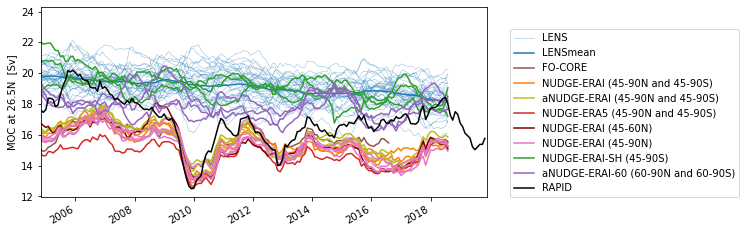

In [9]:
fig,ax = plt.subplots(1,figsize=(8,3.5))
for n, name in enumerate(mynames):

    ds.rolling(time=12, center=True).mean().MOC.sel(names=name).plot(ax=ax, **lineplotprop[name]) 

ax.set_ylabel('MOC at 26.5N  [Sv]')   
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(),loc=(1.05,0))
ax.set_xlim(['2004-11','2019-12'])
ax.set_title('')
ax.set_xlabel('')
plt.show()
fig.savefig('figs/suppFig2.pdf', dpi=500, bbox_inches='tight')
plt.close()